In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Error: Session cannot generate requests

In [ ]:
## SET SNS DEFAULTS
from matplotlib import rcParams
rcParams['figure.figsize']= 11.7, 8.27
sns.set_style('white', rc = {"lines.linewidth":50})
# sns.set_context('poster', font_scale = 5)
sns.set_theme(context = 'paper', style = 'white', palette = 'Set2', font = 'Times New Roman', font_scale = 3)

In [8]:
folder = 'results'
import json
from glob import glob
import os

data = []
for file in sorted(glob(os.path.join(folder, 'data_*.json')))[:]:
    with open(file) as f:
        data.append(json.load(f))

data_params = []
for file in sorted(glob(os.path.join(folder, 'data_params_*.json')))[:]:
    with open(file) as f:
        data_params.append(json.load(f))

model_params = []
for file in sorted(glob(os.path.join(folder, 'model_params_*.json')))[:]:
    with open(file) as f:
        model_params.append(json.load(f))

In [11]:
model_params[0]

{'cv': 5,
 'error_score': None,
 'estimator': {'base_estimator': {'ccp_alpha': 0.0,
   'criterion': 'mse',
   'max_depth': None,
   'max_leaf_nodes': None,
   'min_impurity_split': None,
   'min_samples_split': 2,
   'random_state': None,
   'splitter': 'best'},
  'ccp_alpha': 0.0,
  'criterion': 'mse',
  'estimator_params': ['criterion',
   'max_depth',
   'min_samples_split',
   'min_samples_leaf',
   'min_weight_fraction_leaf',
   'max_features',
   'max_leaf_nodes',
   'min_impurity_decrease',
   'min_impurity_split',
   'random_state',
   'ccp_alpha'],
  'max_depth': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_weight_fraction_leaf': 0.0,
  'n_jobs': None,
  'random_state': None,
  'verbose': 0},
 'n_jobs': None,
 'param_grid': {'n_estimators': [10, 50, 100]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
defenses = df.def_name
new_names = []
for defense in defenses:
    new = str(defense).split("-")[0]
    new_names.append(new)
df['def_gen'] = new_names

attacks= df.attack_name 
new_names = []
for attack in attacks:
    new = str(attack).split("-")[0]
    new_names.append(new)
df['atk_gen'] = new_names
df['def_gen'][df['def_gen'] == 'Spatial Smoothing2'] = 'Spatial Smoothing'
df['attack_time'] = np.divide(df['attack_time'], df['attack_size'])

C:\Users\charlie\AppData\Local\Temp/ipykernel_8216/3871995365.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['def_gen'][df['def_gen'] == 'Spatial Smoothing2'] = 'Spatial Smoothing'


In [ ]:
df.atk_gen

Error: Session cannot generate requests

In [ ]:
fig, ax = plt.subplots()
tmp = np.divide(df.attack_time, df.attack_size)
df.attack_time = tmp
sns.boxplot(data = df, x = 'atk_gen', y = 'attack_time');
plt.legend(bbox_to_anchor = [1,1]);
plt.xlabel("Attack Type")
plt.xticks(rotation = 90)
plt.yscale('log')
plt.ylabel("Attack Time (seconds per frame)")

No handles with labels found to put in legend.


Text(0, 0.5, 'Attack Time (seconds per frame)')

In [ ]:
fig, ax = plt.subplots()
tmp = np.divide(df.train_time, df.n)
df.train_time = tmp
sns.boxplot(data = df, x = 'def_gen', y = 'train_time');
plt.legend(bbox_to_anchor = [1,1]);
plt.xlabel("Defense Type")
plt.xticks(rotation = 90)
# plt.yscale('log')
plt.ylabel("Training Time (seconds per frame)")

Error: Session cannot generate requests

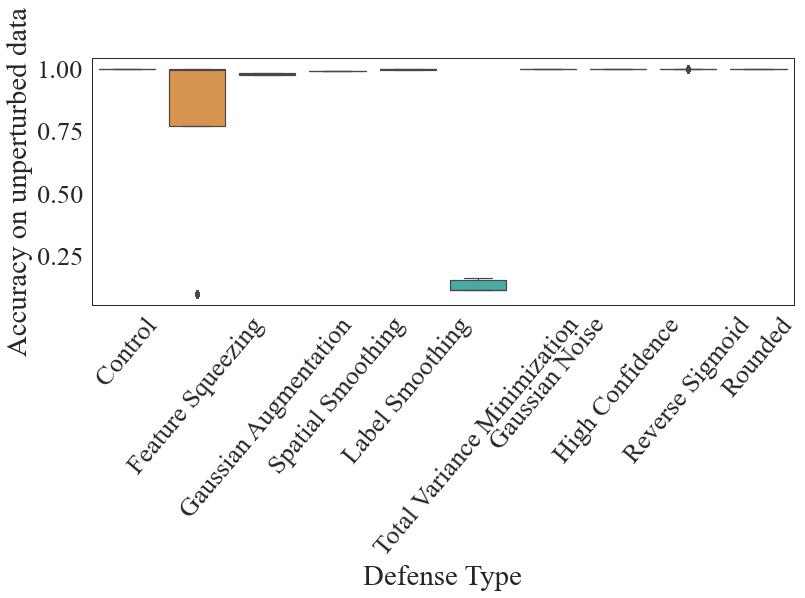

In [ ]:
fig, ax = plt.subplots()
# df = df_now
sns.boxplot(data = df, x = 'def_gen', y = 'ben_acc');
# ax[0].xticks(rotation=45);

# plt.xticks(rotation=45);
plt.xlabel("Defense Type")
plt.ylabel("Accuracy on unperturbed data")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation =50)
fig.tight_layout()

Text(0, 0.5, 'Accuracy on Perturbed Data for All Defenses')

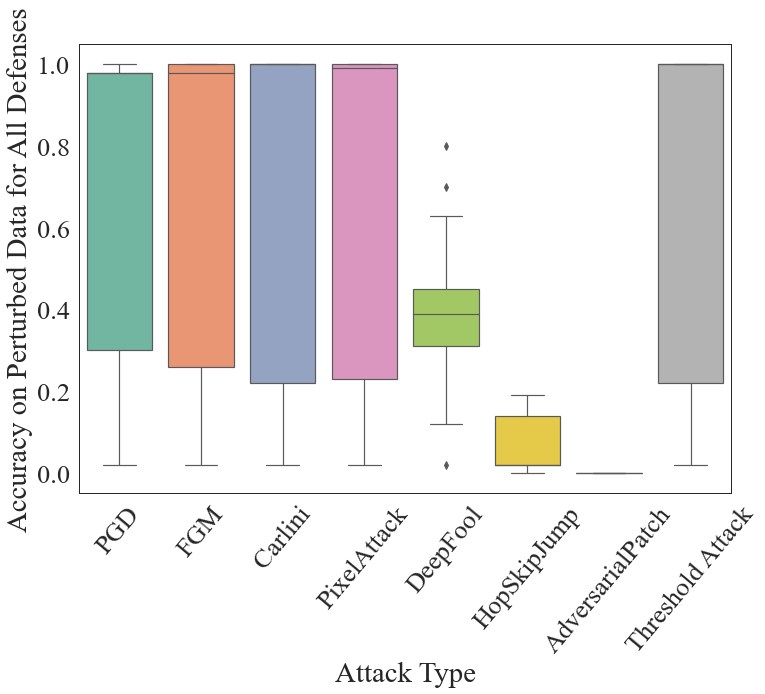

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(data = df, x = 'atk_gen', y = 'adv_acc');
plt.sca(ax)
plt.xticks(rotation = 50);
plt.xlabel("Attack Type")
plt.ylabel("Accuracy on Perturbed Data for All Defenses")

In [ ]:
control = df[df['def_name'] == 'Control']
control.ben_acc
control = max(control.ben_acc)

In [ ]:
import numpy as np
attacks = list(set(df.attack_name))
defenses = list(set(df.def_name))

ben_grid_acc = []
adv_grid_acc = []
gap_grid = []
best_grid = []

# i = 0
# j = 0
for i in range(len(attacks)):
    for j in range(len(defenses)):
        tmp = df[df['attack_name'] == attacks[i]]
        tmp = tmp[tmp['def_name'] == defenses[j]]
        
        this = np.mean(tmp.ben_acc)
        ben_grid_acc.append(this)
        
        that = np.mean(tmp.adv_acc)
        adv_grid_acc.append(that)
        
        other = np.subtract(control, this)
        gap_grid.append(other)

        best = np.max(tmp.adv_acc)
        best_grid.append(best)
        # best_loc = tmp.adv_acc[best]
        # best_iloc = tmp[best_loc]

ben_acc_array = np.array(ben_grid_acc)
adv_acc_array = np.array(adv_grid_acc)
gap_grid = np.array(gap_grid)
best_grid = np.array(best_grid)

ben_acc_array = ben_acc_array.reshape(len(attacks), len(defenses))
adv_acc_array = adv_acc_array.reshape(len(attacks), len(defenses))
gap_grid = gap_grid.reshape(len(attacks), len(defenses))
best_grid = best_grid.reshape(len(attacks), len(defenses))

assert len(ben_grid_acc) == len(adv_grid_acc)
assert len(ben_grid_acc) == len(attacks) * len(defenses)
assert gap_grid.shape == (len(attacks), len(defenses))

<AxesSubplot:>

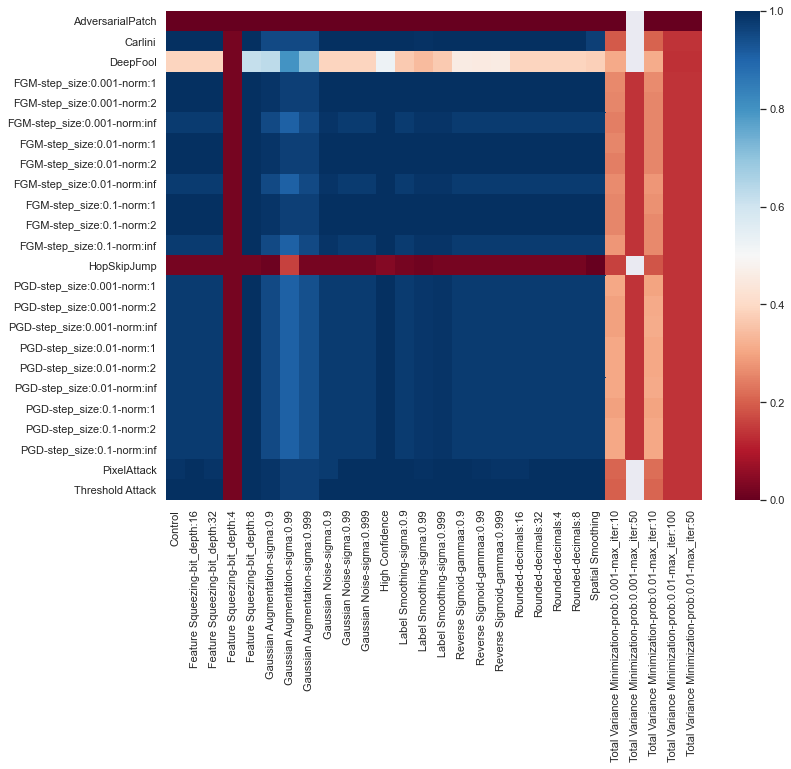

In [ ]:
from matplotlib.colors import LogNorm, Normalize
adv_acc_array = pd.DataFrame(adv_acc_array)
sns.set(font_scale = 2)
sns.set(rc={'figure.figsize':(12,9)})
assert len(adv_acc_array.columns) == len(defenses)
assert len(adv_acc_array.index) == len(attacks)
adv_acc_array.columns = defenses
adv_acc_array.index = attacks
adv_acc_array.sort_index(axis = 1, inplace = True)
adv_acc_array.sort_index(axis = 0, inplace = True)
# adv_acc_array = adv_acc_array.reindex(sorted(adv_acc_array.columns), axis=1)
sns.heatmap((adv_acc_array), cmap = 'RdBu', norm = Normalize(), robust = True)
# plt.xticks(rotation = 70);

No handles with labels found to put in legend.


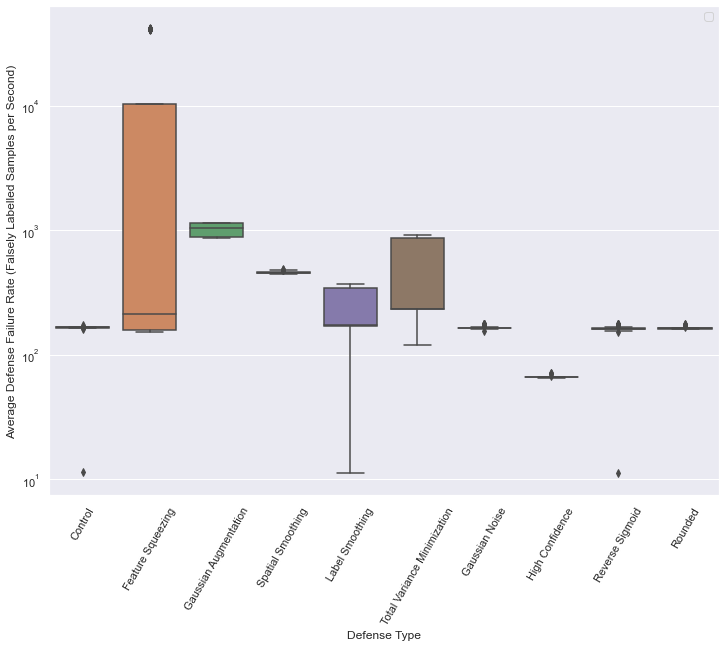

In [ ]:
df['ben_failure_rate'] = np.divide(1-df.ben_acc, df.ben_pred_time/df.n)
fig, ax = plt.subplots()
sns.boxplot(data = df, x = 'def_gen', y = 'ben_failure_rate');
plt.legend(bbox_to_anchor = [1,1]);
plt.xlabel("Defense Type")
plt.yscale('log')
plt.xticks(rotation = 60)
plt.ylabel("Average Defense Failure Rate (Falsely Labelled Samples per Second)");
# sns.heatmap(best_grid, cmap = 'vlag_r')

No handles with labels found to put in legend.


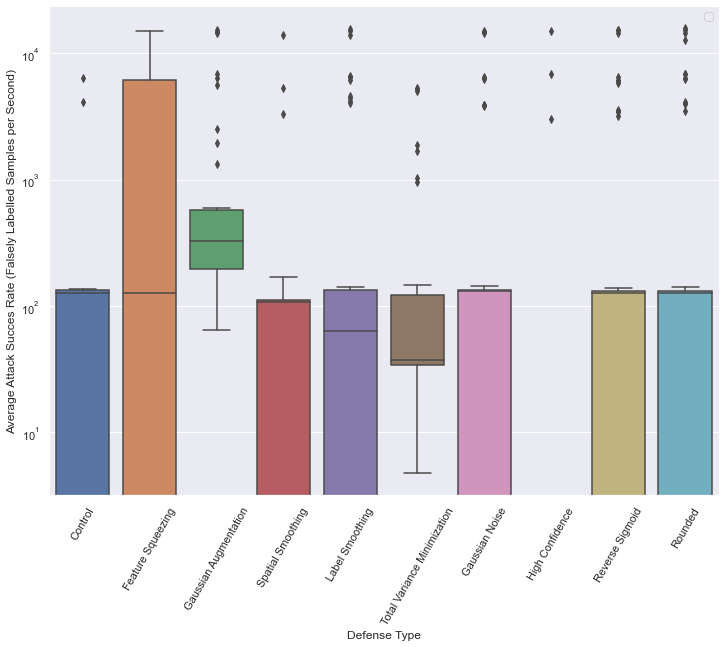

In [ ]:
df['attack_success_rate'] = np.divide(1-df.adv_acc, df.adv_pred_time/df.attack_size)
fig, ax = plt.subplots()
sns.boxplot(data = df, x = 'def_gen', y = 'attack_success_rate');
plt.legend(bbox_to_anchor = [1,1]);
plt.xlabel("Defense Type")
plt.yscale('log')
plt.xticks(rotation = 60)
plt.ylabel("Average Attack Succes Rate (Falsely Labelled Samples per Second)");
# sns.heatmap(best_grid, cmap = 'vlag_r')

No handles with labels found to put in legend.


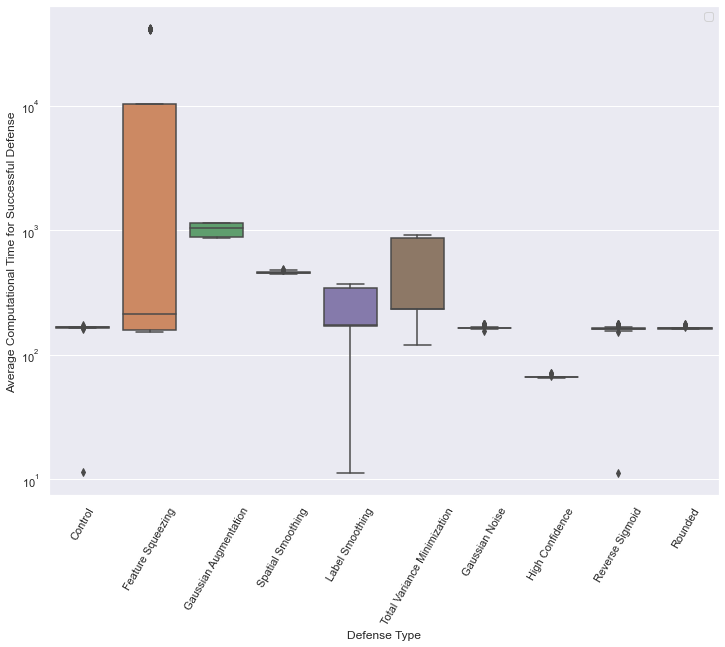

In [ ]:
df['ben_train_rate'] = np.multiply(df.train_time, df.adv_acc)
fig, ax = plt.subplots()
sns.boxplot(data = df, x = 'def_gen', y = 'ben_failure_rate');
plt.legend(bbox_to_anchor = [1,1]);
plt.xlabel("Defense Type")
plt.yscale('log')
plt.xticks(rotation = 60)
plt.ylabel("Average Computational Time for Successful Defense");
# sns.heatmap(best_grid, cmap = 'vlag_r')

No handles with labels found to put in legend.


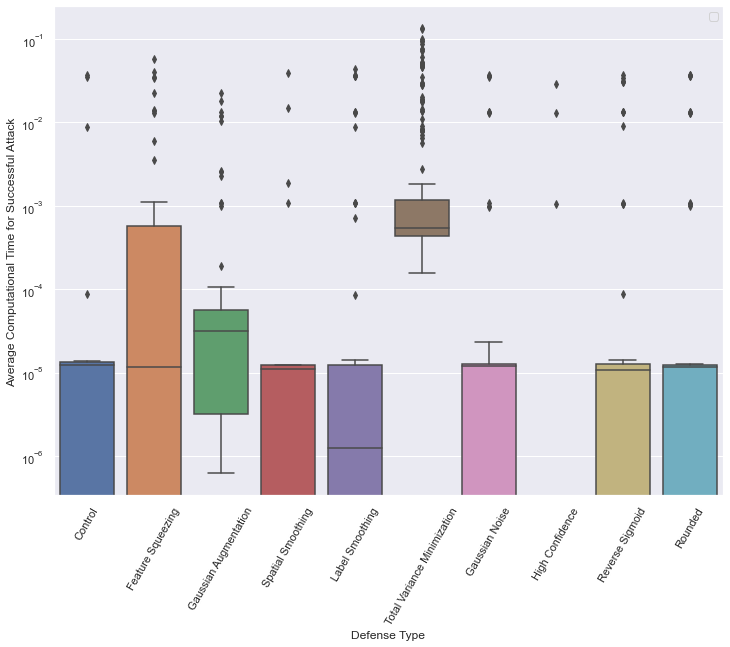

In [ ]:
df['adv_train_rate'] = np.multiply(df.attack_time, 1-df.adv_acc)
fig, ax = plt.subplots()
sns.boxplot(data = df, x = 'def_gen', y = 'adv_train_rate');
plt.legend(bbox_to_anchor = [1,1]);
plt.xlabel("Defense Type")
plt.yscale('log')
plt.xticks(rotation = 60)
plt.ylabel("Average Computational Time for Successful Attack");
# sns.heatmap(best_grid, cmap = 'vlag_r')

No handles with labels found to put in legend.


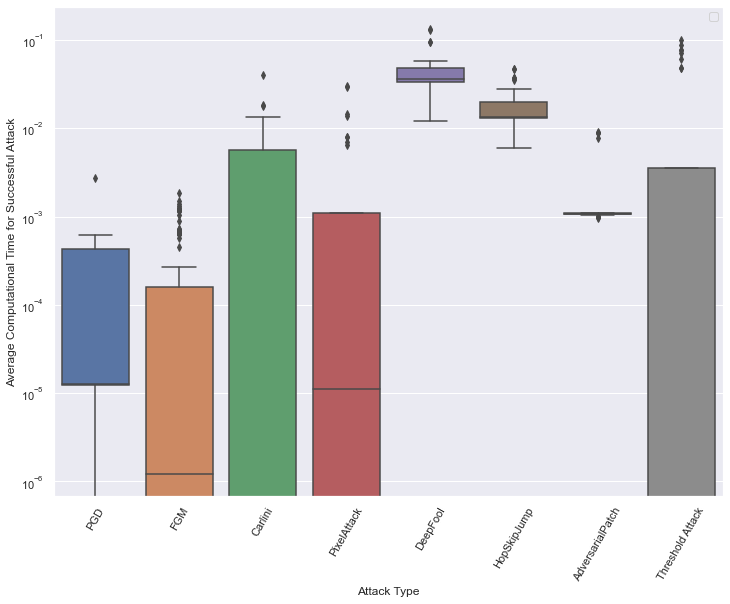

In [ ]:

fig, ax = plt.subplots()
sns.boxplot(data = df, x = 'atk_gen', y = 'adv_train_rate');
plt.legend(bbox_to_anchor = [1,1]);
plt.xlabel("Attack Type")
plt.yscale('log')
plt.xticks(rotation = 60)
plt.ylabel("Average Computational Time for Successful Attack");
# sns.heatmap(best_grid, cmap = 'vlag_r')